**Data Download**

In [2]:
'''
The following code for downloading, importing and displaying the Fashion MNIST dataset is adapted
from ChatGPT, accessed February 27, 2024
'''
import numpy as np
import requests
import gzip
import os

def download_fashion_mnist(url, file_name):
    # Check if file already exists
    if not os.path.exists(file_name):
        # Download the file
        r = requests.get(url)
        with open(file_name, 'wb') as f:
            f.write(r.content)

def load_fashion_mnist(image_file, label_file):
    # Read image file
    with gzip.open(image_file, 'rb') as f:
        images = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)

    # Read label file
    with gzip.open(label_file, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)

    return images, labels

# URLs for Fashion MNIST dataset
image_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz'
label_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz'

# File names to save the downloaded files
image_file = 'train-images-idx3-ubyte.gz'
label_file = 'train-labels-idx1-ubyte.gz'

# Download Fashion MNIST dataset
download_fashion_mnist(image_url, image_file)
download_fashion_mnist(label_url, label_file)

# Load Fashion MNIST dataset
train_images, train_labels = load_fashion_mnist(image_file, label_file)

# URLs for Fashion MNIST test dataset
test_image_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz'
test_label_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz'

# File names to save the downloaded files for test dataset
test_image_file = 't10k-images-idx3-ubyte.gz'
test_label_file = 't10k-labels-idx1-ubyte.gz'

# Download Fashion MNIST dataset
download_fashion_mnist(test_image_url, test_image_file)
download_fashion_mnist(test_label_url, test_label_file)

# Load Fashion MNIST dataset
test_images, test_labels = load_fashion_mnist(test_image_file, test_label_file)

# Class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


**Visualizing a random image**

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Text(0.5, 1.0, 'Image: Sneaker')

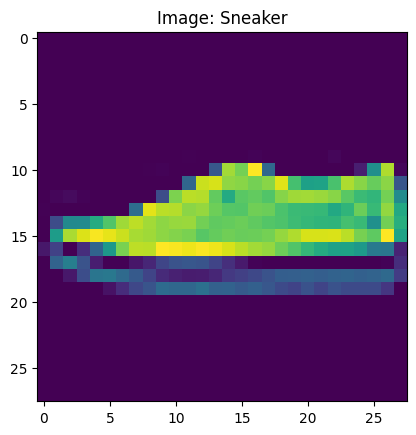

In [3]:
from matplotlib import pyplot as plt
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
rand_img_idx=np.random.choice(range(train_images.shape[0]))
plt.imshow(train_images[rand_img_idx])
plt.title(f'Image: {class_names[train_labels[rand_img_idx]]}')

**Visualizing Class Statistics**

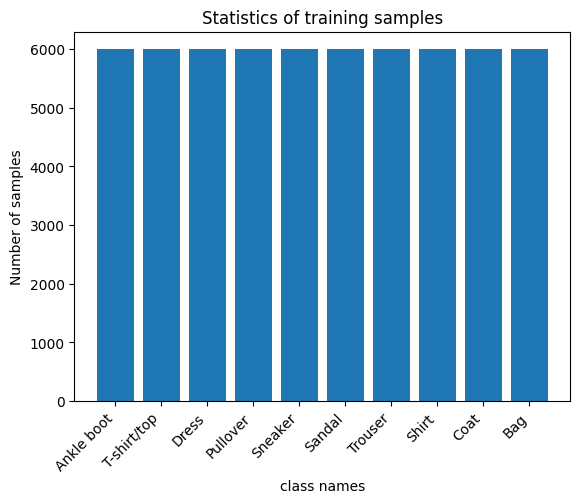

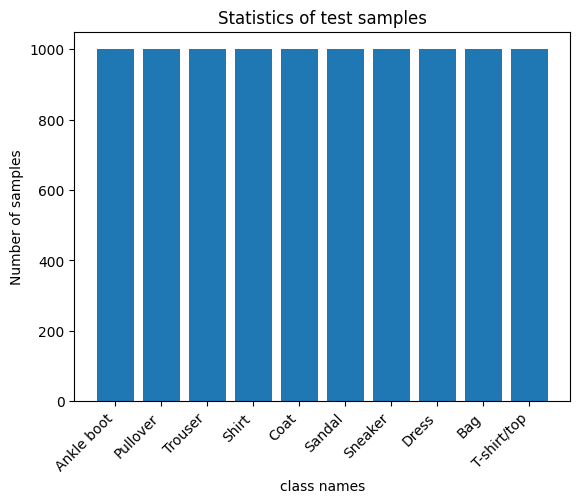

In [4]:
from collections import Counter
train_dist=Counter(train_labels)
label_id_train=np.array(list(train_dist.keys()))
values_train=np.array(list(train_dist.values()))
label_train=np.array(class_names)[label_id_train]

test_dist=Counter(test_labels)
label_id_test=np.array(list(test_dist.keys()))
values_test=np.array(list(test_dist.values()))
label_test=np.array(class_names)[label_id_test]

plt.bar(label_train,values_train)
plt.xticks(rotation=45, ha="right")
plt.xlabel('class names')
plt.ylabel('Number of samples')
plt.title('Statistics of training samples')
plt.show()

plt.figure()
plt.bar(label_test,values_test)
plt.xticks(rotation=45, ha="right")
plt.xlabel('class names')
plt.ylabel('Number of samples')
plt.title('Statistics of test samples')
plt.show()

**Data Preprocessing**

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=1000, train_size=59000, random_state=42
)
# Reshape and normalize the images
x_train = train_images.reshape(train_images.shape[0], -1)  # Unravel images into vectors
x_test = test_images.reshape(test_images.shape[0], -1)
x_val = val_images.reshape(val_images.shape[0], -1)

train_labels=np.array(train_labels)
test_labels=np.array(test_labels)
val_labels=np.array(val_labels)

# Normalize the images to have zero mean and unit standard deviation
x_train = (x_train - np.mean(x_train)) / np.std(x_train)
x_test = (x_test - np.mean(x_train)) / np.std(x_train)
x_val = (x_val - np.mean(x_train)) / np.std(x_train)


# Verify normalization
print("Mean of x_train:", np.mean(x_train))
print("Standard deviation of x_train:", np.std(x_train))


Mean of x_train: -1.218306749922528e-16
Standard deviation of x_train: 1.0000000000000002


**Initial Testing on a base model (random parameter) using a small dataset**

In [5]:
from sklearn.neighbors import KNeighborsClassifier as KNNClassifier
KNN=KNNClassifier(n_neighbors=25)
KNN.fit(x_train,train_labels)
y_pred=np.array(KNN.predict(x_val[:25]))
acc=np.where(y_pred==val_labels[:25])
print(f"Accuracy is {len(acc[0])*100/25}%")
test_pairs=list(zip(val_labels[:25],y_pred))

Accuracy is 40.0%


**Hyper-parameter tuning using validation set**

In [11]:
import numpy as np
import json
from sklearn.neighbors import KNeighborsClassifier as KNNClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define the hyperparameter search space
param_grid = {
    'n_neighbors': [3, 5,7,9,11,21,31,55],
    'weights': ['distance'],
    'leaf_size': [10],
    'metric': ['minkowski'],
    'p': [1],
    'pca_components': [500,600,700]  # Try different PCA reductions, None means no PCA
}

best_accuracy = 0
best_config = {}

# Standardize data before applying PCA


# Loop through parameter combinations
for n_neighbors in param_grid['n_neighbors']:
    for weights in param_grid['weights']:
        for p in param_grid['p']:
            for leaf in param_grid['leaf_size']:
                for m in param_grid['metric']:
                    for pca_components in param_grid['pca_components']:

                        # Apply PCA if needed
                        if pca_components is not None:
                            pca = PCA(n_components=pca_components)
                            x_train_pca = pca.fit_transform(x_train)
                            x_val_pca = pca.transform(x_val)
                        else:
                            x_train_pca = x_train
                            x_val_pca = x_val

                        # Train KNN
                        KNN = KNNClassifier(n_neighbors=n_neighbors, weights=weights, p=p, leaf_size=leaf, metric=m)
                        KNN.fit(x_train_pca, train_labels)

                        # Make predictions
                        y_pred = np.array(KNN.predict(x_val_pca))

                        # Compute accuracy
                        accuracy = np.mean(y_pred == val_labels) * 100

                        # Store the best configuration
                        if accuracy > best_accuracy:
                            best_accuracy = accuracy
                            best_config = {
                                'n_neighbors': n_neighbors,
                                'weights': weights,
                                'p': p,
                                'leaf_size': leaf,
                                'metric': m,
                                'pca_components': pca_components,
                                'accuracy': accuracy
                            }

                        print(f"Config: n_neighbors={n_neighbors}, weights={weights}, p={p}, leaf_size={leaf}, metric={m}, PCA={pca_components} -> Accuracy: {accuracy:.2f}%")

# Save the best configuration and accuracy to a file
with open("best_knn_pca_config.json", "w") as f:
    json.dump(best_config, f, indent=4)

print("\nBest Configuration Saved:")
print(json.dumps(best_config, indent=4))


Config: n_neighbors=3, weights=distance, p=1, leaf_size=10, metric=minkowski, PCA=500 -> Accuracy: 80.50%
Config: n_neighbors=3, weights=distance, p=1, leaf_size=10, metric=minkowski, PCA=600 -> Accuracy: 81.20%
Config: n_neighbors=3, weights=distance, p=1, leaf_size=10, metric=minkowski, PCA=700 -> Accuracy: 81.50%
Config: n_neighbors=5, weights=distance, p=1, leaf_size=10, metric=minkowski, PCA=500 -> Accuracy: 80.40%
Config: n_neighbors=5, weights=distance, p=1, leaf_size=10, metric=minkowski, PCA=600 -> Accuracy: 81.30%
Config: n_neighbors=5, weights=distance, p=1, leaf_size=10, metric=minkowski, PCA=700 -> Accuracy: 81.20%
Config: n_neighbors=7, weights=distance, p=1, leaf_size=10, metric=minkowski, PCA=500 -> Accuracy: 79.40%
Config: n_neighbors=7, weights=distance, p=1, leaf_size=10, metric=minkowski, PCA=600 -> Accuracy: 80.40%
Config: n_neighbors=7, weights=distance, p=1, leaf_size=10, metric=minkowski, PCA=700 -> Accuracy: 81.20%
Config: n_neighbors=9, weights=distance, p=1, 

**Creating the performance metric function necessary for testing**

In [13]:
def compute_accuracy(test_pairs, num_classes):
    correct = sum(1 for true, pred in test_pairs if true == pred)
    total = len(test_pairs)
    return correct / total if total > 0 else 0
import numpy as np

def compute_per_class_accuracy(test_pairs, num_classes):
    correct_per_class = np.zeros(num_classes)
    total_per_class = np.zeros(num_classes)

    for true, pred in test_pairs:
        if true == pred:
            correct_per_class[true] += 1
        total_per_class[true] += 1  # Count instances of each class

    # Avoid division by zero by using np.where
    return np.round(np.where(total_per_class > 0, correct_per_class / total_per_class, 0),2)

def compute_confusion_matrix(test_pairs, num_classes):
    cm = np.zeros((num_classes, num_classes), dtype=int)

    for true, pred in test_pairs:
        cm[true, pred] += 1  # Increment the corresponding (true, pred) cell

    return cm


**Testing the tuned model on the test set**

In [14]:
pca = PCA(n_components=700)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)


KNN = KNNClassifier(n_neighbors=3, weights='distance', p=1, leaf_size=10, metric='minkowski')
KNN.fit(x_train_pca, train_labels)
# Make predictions
y_pred = np.array(KNN.predict(x_test_pca))
test_pairs=list(zip(test_labels,y_pred))

num_classes = len(class_names)
accuracy = compute_accuracy(test_pairs, num_classes)
print(f'accuracy: {accuracy:.2f}')

per_class_accuracy = compute_per_class_accuracy(test_pairs, num_classes)
print()
print('Per class accuracy')
for i, acc in enumerate(per_class_accuracy):
    print(f'{i}: {acc:4.2f}')

cm = compute_confusion_matrix(test_pairs, num_classes)
print(f'\nConfusion matrix')
for i in range(num_classes):
    print(f'{i:2d}:', end='')
    for j in range(num_classes):
        print(f' {cm[i, j]:2d}', end='')
    print()


accuracy: 0.81

Per class accuracy
0: 0.77
1: 0.98
2: 0.77
3: 0.87
4: 0.76
5: 0.77
6: 0.47
7: 0.74
8: 0.98
9: 0.97

Confusion matrix
 0: 767  3 37 33  9  3 119  0 26  3
 1:  3 975  1 12  3  0  3  0  2  1
 2: 27  2 772  8 120  0 54  0 13  4
 3: 19 16  8 868 51  0 24  0 12  2
 4:  0  1 163 25 759  0 39  0  9  4
 5: 23  0 22  2  3 766 28 34 41 81
 6: 186  6 157 25 116  0 467  0 39  4
 7: 33  1 18  0  3  9 65 738 90 43
 8:  3  1  4  4  4  0  6  1 975  2
 9:  2  0  1  0  0  4  2 19  1 971


**Discussion**

The k-nearest neighbors (k-NN) classifier achieved an overall accuracy of 81% on the Fashion MNIST test set. While this performance in accuracy is reasonably strong, there is a variability in accuracy among different classes. This indicates that some classes are easier to identify for the KNN classifier, while some classes confuse the KNN classifier because of their similarity to other classes.

**Per-Class Accuracy Analysis**

The highest per-class accuracies were observed for the 'Trouser' (98%), 'Bag' (98%), and 'Ankle boot' (97%) categories. These results indicate that these classes have distinct features that are far away in feature space than other classes, which allowed them to be easily identified by the KNN. ![Alt text](img1.jpg)

On the other hand, the 'Shirt' category had the lowest accuracy at only 47%. This suggests significant confusion between shirts and other categories such as 'T-shirt/top' and 'Coat'. This happened because shirts, t-shirts and coats have similar features that are relatively closer in the feature space. Additionally, classes like 'Pullover' (77%), 'Coat' (76%), and 'Sandal' (77%) also exhibited lower accuracy, indicating difficulties in distinguishing these categories. ![Alt text](img2.jpg)

**Confusion Matrix Insights**

The confusion matrix further highlights the classifier's struggles with certain classes. The 'Shirt' category was frequently misclassified as 'T-shirt/top' and 'Coat', which aligns with the low per-class accuracy. Similarly, 'Pullover' was often confused with 'Coat', suggesting that k-NN struggled with distinguishing these upper-body garments.

For the well-performing classes such as 'Trouser', the confusion matrix shows very few misclassifications. This again justifies the idea that some classes have features that are distinct from the others that make them easier to classify.

**Observation**

From the hyper-parameter tuning part, using the validation set, it was observed that the model accuract does not work well unless we set 'metric'='minkowski' and 'weights'='distance'. Any configuration other than these two did not produce good result. So we fixed these two parameters and did a grid search on 'n_neighbors' and 'pca_components'. Although I thought a lower value of the PCA will be just as good enough as using all the features, that was not the case. We only started getting good result (over 80%), when we chose PCA components over 600. As there is no hierarchical feature in KNN like Deep Neural network, using more information about raw pixel increase the accuracy.


**Conclusion**

While k-NN provides an intuitive and interpretable baseline for classification, its limitations in handling similar-looking classes highlight the need for feature engineering or more advanced models. The results demonstrate that while distinct classes like 'Trouser' and 'Bag' are classified with high accuracy, overlapping categories such as 'Shirt' and 'Pullover' pose challenges. 



In [10]:
print(test_labels[:20])
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]


In [81]:
'''
Test code for error metrics. Leave this unchanged.
'''
test_pairs = [
    (1, 1),
    (1, 4),
    (0, 0),
    (0, 2),
    (3, 1),
    (4, 2),
    (4, 4),
    (2, 2),
    (2, 2),
    (3, 3),
    (4, 0),
    (4, 4),
    (1, 1),
    (0, 0),
    (0, 2),
    (1, 4),
    (1, 1),
    (0, 0),
    (0, 1),
    (2, 3),
]

num_classes = 5
accuracy = compute_accuracy(test_pairs, num_classes)
print(f'accuracy: {accuracy:.2f}')

per_class_accuracy = compute_per_class_accuracy(test_pairs, num_classes)
print()
print('Per class accuracy')
for i, acc in enumerate(per_class_accuracy):
    print(f'{i}: {acc:4.2f}')

cm = compute_confusion_matrix(test_pairs, num_classes)
print(f'\nConfusion matrix')
for i in range(num_classes):
    print(f'{i:2d}:', end='')
    for j in range(num_classes):
        print(f' {cm[i, j]:2d}', end='')
    print()

accuracy: 0.55

Per class accuracy
0: 0.50
1: 0.60
2: 0.67
3: 0.50
4: 0.50

Confusion matrix
 0:  3  1  2  0  0
 1:  0  3  0  0  2
 2:  0  0  2  1  0
 3:  0  1  0  1  0
 4:  1  0  1  0  2


In [ ]:
Best Configuration Saved:
{
    "n_neighbors": 3,
    "weights": "distance",
    "p": 1,
    "leaf_size": 10,
    "metric": "minkowski",
    "pca_components": 728,
    "accuracy": 81.6
}